# **Project Name**    - Email Campaign Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

First of all we have a data related to Email Campaign. Our business objective is to create a Machine Learning Model that will predict an email can be ignored, read or acknowledged by the customer. For this project at first we had to import some python libraries. We imported pandas and numpy for data manipulation, matplotlib and seaborn from visualization and so many sklearn sub-libraries for model building. After that we imported out dataset. By the help of this past data we had created our model. Then we cleand our data. Then we took some insight from this data like by the help of visualization. Then we used dist plot, bar plot, heatmap plot, scatter plot etc for the visualization. After that we had started our model building. Then we had to work on our data because model can not read text data. For this we changed our categorical values to numrical. Our data set was not balanced so we used over sampeling method for balancing it. After that we got our final data which is maching readable format. Then We create 3 models which are Logistic Regression, Decition Tree and XGBoost respectively.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The main objective of this project is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Dataset Loading

In [3]:
# Load Dataset
dataset=pd.read_csv('data_email_campaign.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(68353, 12)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Text(0.5, 1.0, 'Visualisation of missing values')

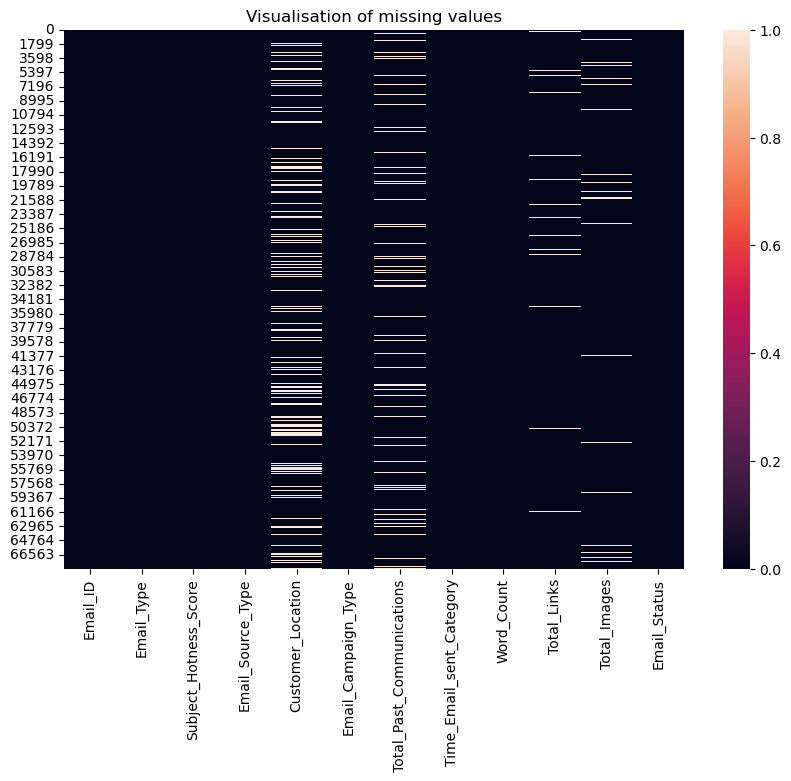

In [9]:
# Visualizing the missing values
plt.figure(figsize=(10,7))
sns.heatmap(dataset.isnull())
plt.title('Visualisation of missing values')

### What did you know about your dataset?

From the above analysis we know the following details.
1. There are 68353 rows and 12 columns.
2. Dataset doesn't contain any duplicate row or column.
3. Customer_Location column has 11595,Total_Past_Communications has 6825,Total_Links has 2201 and Total_Images has 1677 null values.
4. Here most of the missing values are present in Customer_Location column.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
a=1
for i in dataset.columns:
    print(a,i)
    a+=1

1 Email_ID
2 Email_Type
3 Subject_Hotness_Score
4 Email_Source_Type
5 Customer_Location
6 Email_Campaign_Type
7 Total_Past_Communications
8 Time_Email_sent_Category
9 Word_Count
10 Total_Links
11 Total_Images
12 Email_Status


In [11]:
# Dataset Describe
dataset.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [12]:
categorical= dataset.dtypes[dataset.dtypes=='object'].index
print(categorical)
dataset[categorical].describe()

Index(['Email_ID', 'Customer_Location'], dtype='object')


,Email_ID,Customer_Location
count,68353,56758
unique,68353,7
top,EMA00081000034500,G
freq,1,23173


### Variables Description 

1. Email_ID :- Emails unique Id.
2. Email_Type:- Type of email (1= marketing emails 2=important updates).
3. Subject_Hotness_Score:- It's the email's subject's score on the basis of how good or effective content is.
4. Email_Source_Type:- It's email source type (1=sales and markating 2= important admin mails).
5. Customer_Location:- Location of the customer.
6. Email_Campaign_Type:- Email campaign type.(1,2,3)
7. Total_Past_Communications:- Total previous mails from same sorouce.
8. Time_Email_sent_Category:- Time email is being sent(1=morning, 2= evening, 3= night)
9. Word_Count:- word counts in the mail.
10. Total_Links:- total links present in the mail.
11. Total_Images:- Total images present in the mail.
12. **Email_Status:- Our Target variable whether mail was 0= ignored, 1= read, 2= acknowledged by the user.**

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
unique_count=pd.DataFrame()
unique_count['UniqueCounts']=dataset.apply(lambda x: x.unique().shape[0])
# values which are uniquely present in the dataset are.
unique_count['Values']=dataset.apply(lambda x: x.unique())
# total counts of null values.
unique_count['Count']=dataset.apply(lambda x: x.isnull().sum())
unique_count

,UniqueCounts,Values,Count
Email_ID,68353,"[EMA00081000034500, EMA00081000045360, EMA0008...",0
Email_Type,2,"[1, 2]",0
Subject_Hotness_Score,51,"[2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ...",0
Email_Source_Type,2,"[2, 1]",0
Customer_Location,8,"[E, nan, B, C, G, D, F, A]",11595
Email_Campaign_Type,3,"[2, 3, 1]",0
Total_Past_Communications,65,"[33.0, 15.0, 36.0, 25.0, 18.0, nan, 34.0, 21.0...",6825
Time_Email_sent_Category,3,"[1, 2, 3]",0
Word_Count,151,"[440, 504, 962, 610, 947, 416, 116, 1241, 655,...",0
Total_Links,38,"[8.0, 5.0, 16.0, 4.0, 11.0, 6.0, 21.0, nan, 31...",2201


## 3. ***Data Wrangling***

### Data Wrangling Code

In [75]:
# Write your code to make your dataset analysis ready.
df=dataset.copy()

In [15]:
# Exploring Email_ID variable
df['Email_ID'][0:15]

0     EMA00081000034500
1     EMA00081000045360
2     EMA00081000066290
3     EMA00081000076560
4     EMA00081000109720
5     EMA00081000131660
6     EMA00081000160500
7     EMA00081000269630
8     EMA00081000287790
9     EMA00081000367310
10    EMA00081000428660
11    EMA00081000583620
12    EMA00081000591290
13    EMA00081000667000
14    EMA00081000781390
Name: Email_ID, dtype: object

In [16]:
# triming the Email_Id 
df['Email_ID']=df['Email_ID'].apply(lambda x: x.replace('EMA0008',''))

In [17]:
# checking if now there is any duplicate value.
df.duplicated().sum()

0

In [18]:
df['Email_ID']=df['Email_ID'].astype(np.int64)

In [19]:
df['Email_ID'].describe()

count    6.835300e+04
mean     4.133695e+09
std      1.925291e+09
min      1.000034e+09
25%      2.528996e+09
50%      4.059249e+09
75%      5.581785e+09
max      9.999317e+09
Name: Email_ID, dtype: float64

In [20]:
# Let us take a closer look to
df['Subject_Hotness_Score'][0:15]

0     2.2
1     2.1
2     0.1
3     3.0
4     0.0
5     1.5
6     3.2
7     0.7
8     2.0
9     0.5
10    0.2
11    1.0
12    0.1
13    4.0
14    3.0
Name: Subject_Hotness_Score, dtype: float64

In [21]:
df['Subject_Hotness_Score'].describe()

count    68353.000000
mean         1.095481
std          0.997578
min          0.000000
25%          0.200000
50%          0.800000
75%          1.800000
max          5.000000
Name: Subject_Hotness_Score, dtype: float64

In [22]:
# checking our Email_Status column's value in percentage(%)
df['Email_Status'].value_counts()/df.shape[0]*100

0    80.378330
1    16.149986
2     3.471684
Name: Email_Status, dtype: float64

### What all manipulations have you done and insights you found?

1. Copied the dataset to df.
2. explored Email_ID cloumn.
3. user .describe() attribute in Email_ID
4. also Explored Subject_Hotness_Score and done .describe()
5. There is not much for data wrangling in this dataframe all clear.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Heatmap

<Axes: >

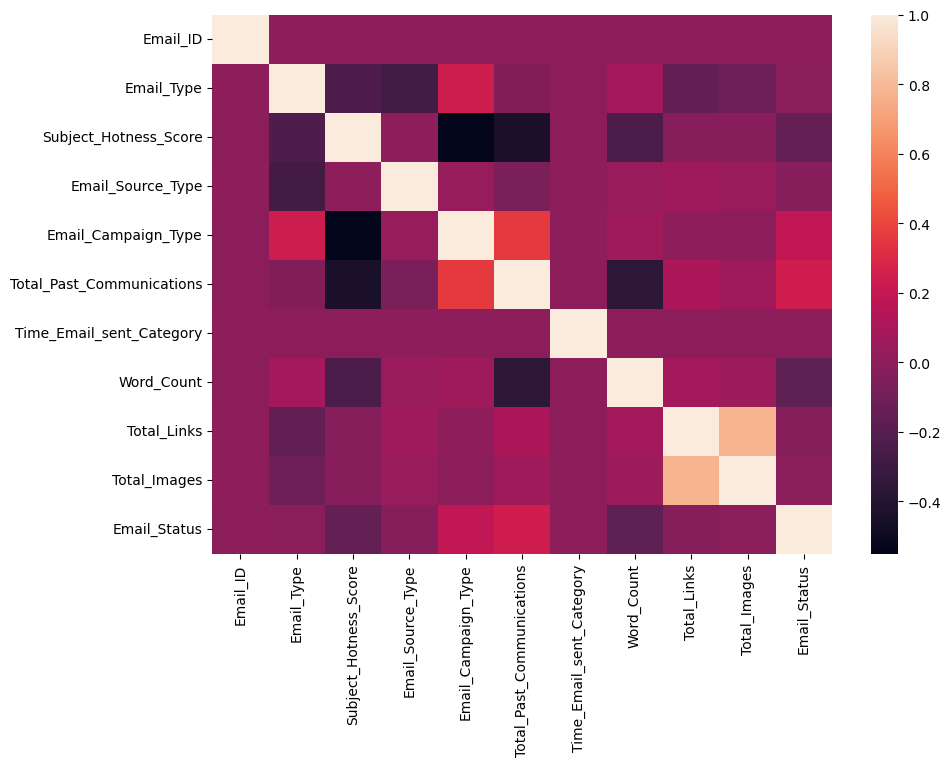

In [49]:
# Chart - 1 visualization code
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr())

##### 1. Why did you pick the specific chart?

Correlation heatmaps provide a visual representation of the correlation matrix, making it easy to identify relationships between multiple variables and pinpointing areas of interest for further analysis.

##### 2. What is/are the insight(s) found from the chart?

In this heat map there is high correlation between following coloumns:-
1. Email_Campaign_Type and subject_Hotness_score are heighly correlated with each other.
2. Total_Past_Communications and subject_Hotness_score are heighly correlated with each other.
3. word_count and Total_past_Communications are heighly correlated.
4. Subject_Hotness_Score and Email_Type are heighly correlated.
5. Email_Source_Type and Email_Type are heighly correlated.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes gained insights may help creating a positive business impact or may effect negative growth as the these columns are negatively correlated.

#### Chart - 2

([<matplotlib.patches.Wedge at 0x28b368ba340>,
 [Text(-0.9791350264236446, 0.6937539910013988, 'ignored by the reader'),
  Text(0.8978020017290247, -0.7962107545690126, 'read by the reader'),
  Text(1.5904930796419734, -0.17416016654502736, 'acknowledged by the reader')],
 [Text(-0.571162098747126, 0.4046898280841492, '80.4%'),
  Text(0.523717834341931, -0.46445627349859064, '16.1%'),
  Text(1.0934639922538565, -0.11973511449970632, '3.5%')])

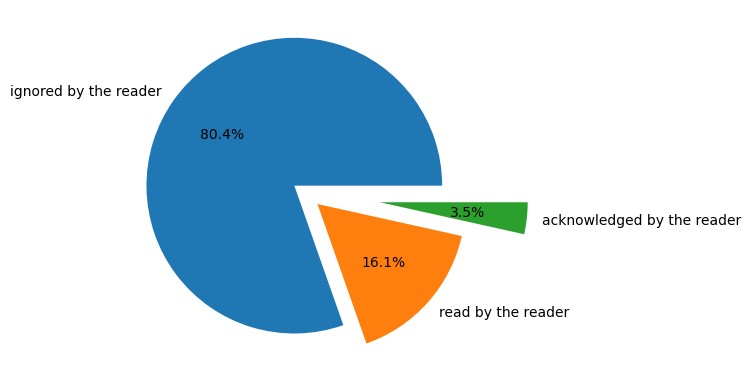

In [50]:
# Chart - 2 visualization code
fig, ax = plt.subplots()
ax.pie(df['Email_Status'].value_counts(), labels=['ignored by the reader','read by the reader','acknowledged by the reader']
       , autopct='%1.1f%%',explode=(0.1, 0.1, 0.5),shadow=False)

##### 1. Why did you pick the specific chart?

Pie charts visually represent proportions of a whole, aiding in easy comparison, but are best used with a limited number of distinct categories for clarity and effectiveness.

##### 2. What is/are the insight(s) found from the chart?

We Data is imbalanced.80.4% emails are ignored by the reader,16.1% are read by the reader and only 3.5% emails are acknowledged by the reader.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Gained insights may lead to a negative growth as it is clearly seen that 80.4% of emails are ignored by the reader and only 
3.5% of emails are acknowledged by the reader.

#### Chart - 3

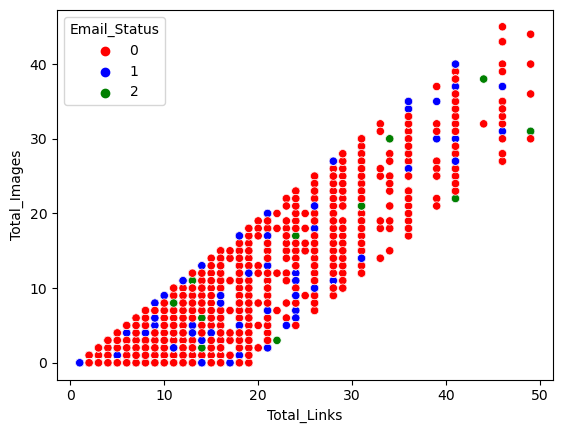

In [54]:
# Chart - 3 visualization code
sns.scatterplot(data=df,x='Total_Links',y='Total_Images',hue='Email_Status',palette=['r','b','g'])
plt.show()

##### 1. Why did you pick the specific chart?

Scatterplots reveal relationships between two variables, showing patterns such as correlations or clusters, aiding in understanding associations and identifying trends in data.

##### 2. What is/are the insight(s) found from the chart?

Most of the emails have less links and images and it is effective because most of the email which is acknowledged by the reader have less images and links. but some emails where number of links and images are high acknowledged by the reader

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It might be usefull if there is less use of images and link.

#### Chart - 4 Word count and Email status

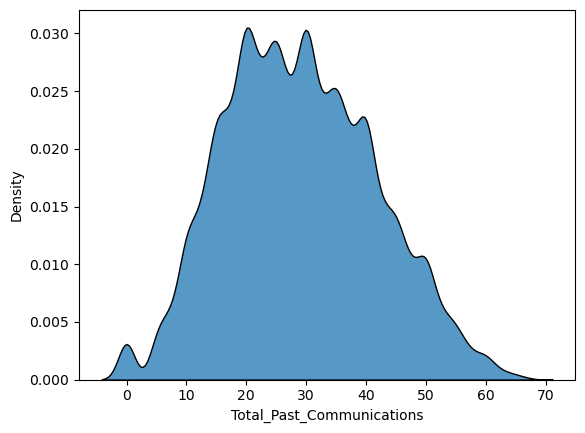

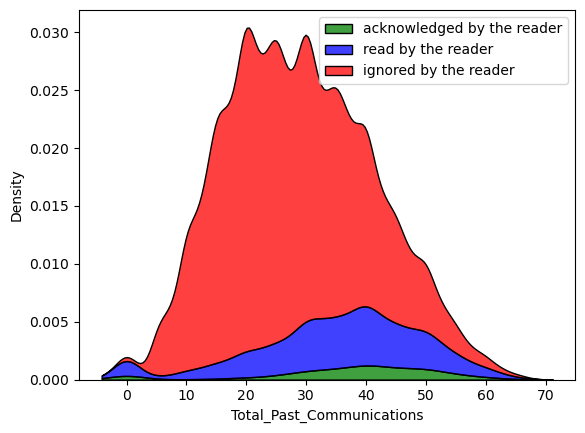

In [55]:
# Chart - 4 visualization code
sns.kdeplot(data=df, x='Total_Past_Communications',multiple="stack")
plt.show()
sns.kdeplot(data=df, x='Total_Past_Communications', hue='Email_Status',multiple="stack",palette=['r','b','g'])
plt.legend(['acknowledged by the reader','read by the reader','ignored by the reader'])
plt.show()

In [57]:
nn=np.where((df['Email_Status']==1)|(df['Email_Status']==2))
df['Total_Past_Communications'].iloc[nn].median()

37.0

##### 1. Why did you pick the specific chart?

Kdeplot visually displays the distribution of data, providing insights into its shape and density, aiding in understanding patterns and making comparisons.

##### 2. What is/are the insight(s) found from the chart?

It is clear that total_past_communications which are in between range 30-50 have high chances to be read and acknowledged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can be effective if there is around 30-50 past communication or past mails from the sender.

#### Chart - 5

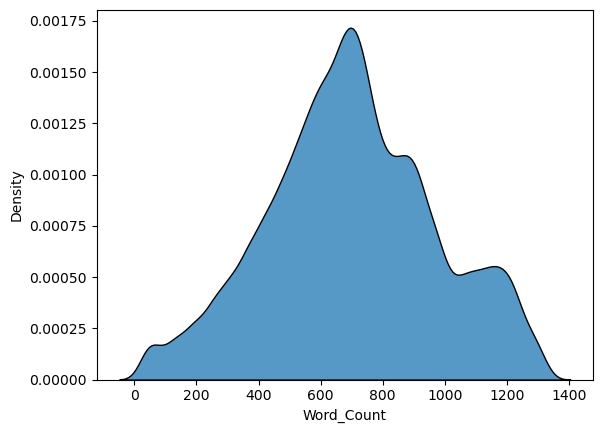

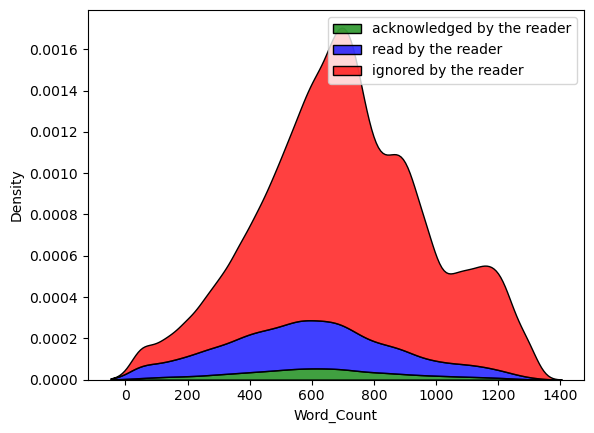

In [56]:
# Chart - 5 visualization code
sns.kdeplot(data=df, x='Word_Count',multiple="stack")
plt.show()
sns.kdeplot(data=df, x='Word_Count', hue='Email_Status',multiple="stack",palette=['r','b','g'])
plt.legend(['acknowledged by the reader','read by the reader','ignored by the reader'])
plt.show()

##### 1. Why did you pick the specific chart?

Kdeplot visually displays the distribution of data, providing insights into its shape and density, aiding in understanding patterns and making comparisons.

##### 2. What is/are the insight(s) found from the chart?

mails which have word count in between 400-800 are more likely to be read and acknowledged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This may impact as we are in rage of 400-800 we can expect the user to read or acknowledge the mail.

#### Chart - 6

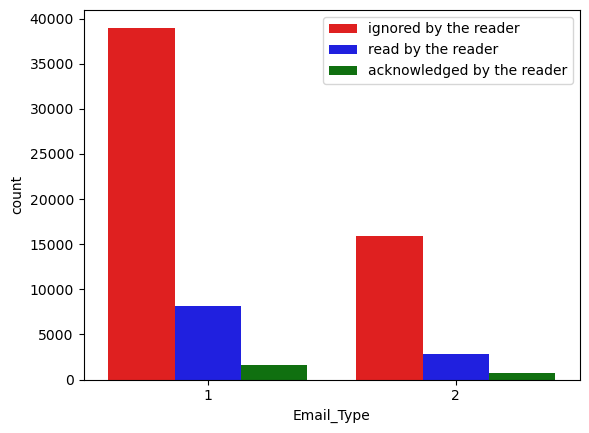

In [61]:
# Chart - 6 visualization code
sns.countplot(df, x='Email_Type', hue='Email_Status',palette=['r','b','g'])
plt.legend(['ignored by the reader','read by the reader','acknowledged by the reader'])
plt.show()

##### 1. Why did you pick the specific chart?

Countplot succinctly visualizes the frequency of categorical data, facilitating quick comparisons and identifying dominant categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

It is clear from the above chart that Type 1 email is mostly ignore by the reader.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights indicate that Type 1 emails are predominantly ignored by readers, suggesting a need to reassess the content or delivery strategy for this email type to improve engagement and potentially create positive business impact. However, solely focusing on Type 1 emails' performance without considering other factors such as audience segmentation or content relevance may lead to negative growth if it overlooks opportunities to tailor communication approaches to different recipient preferences.

#### Chart - 7

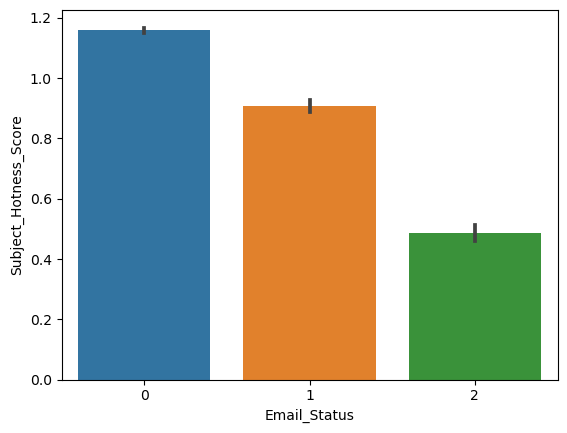

In [71]:
# Chart - 7 visualization code
sns.barplot(data=df,x='Email_Status',y='Subject_Hotness_Score')
plt.show()

##### 1. Why did you pick the specific chart?

bar charts are used to show comparision and best sutable in comparision.

##### 2. What is/are the insight(s) found from the chart?

its very clear that the no of ignored mail is high according to subject hotness score and we can see where ther is low subject hotness score there is high chance of reading and acknowledgeing the mail.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

mail subject hotness score must be checked.

#### Chart - 8 - Pair Plot 

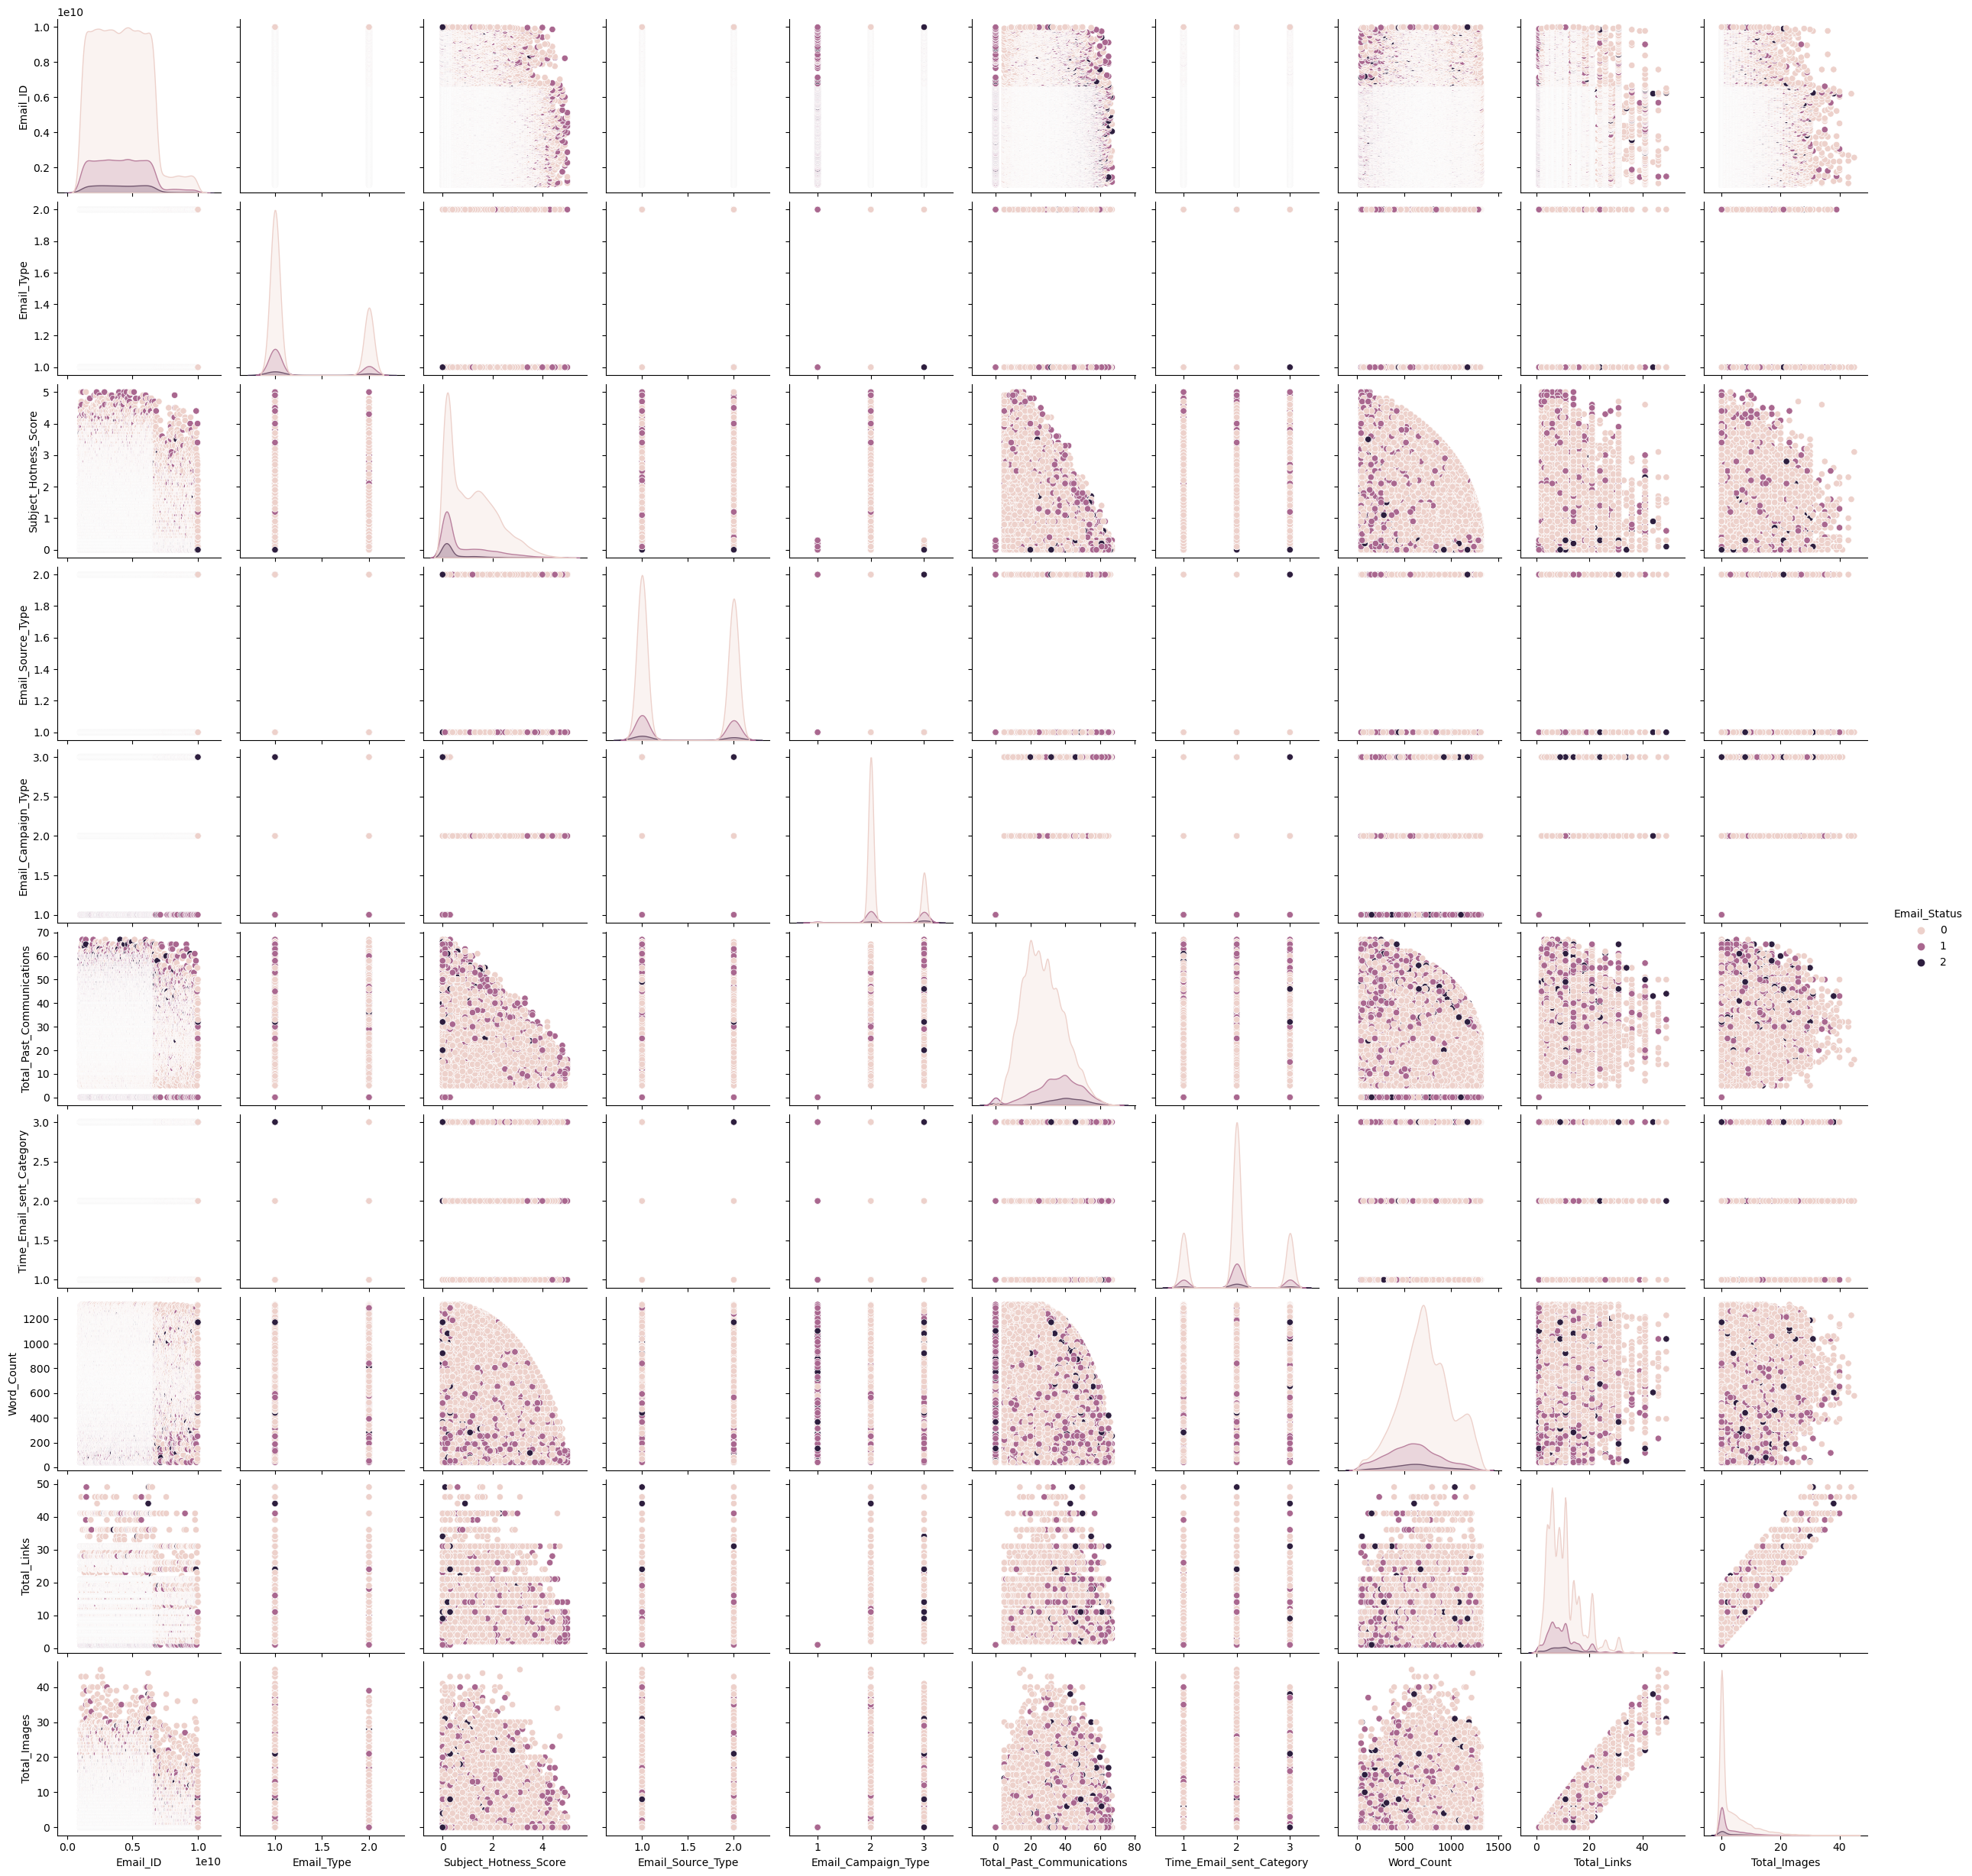

In [72]:
# Pair Plot visualization code
sns.pairplot(df,hue='Email_Status')

##### 1. Why did you pick the specific chart?

Pair plots offer a comprehensive view of pairwise relationships in a dataset, aiding in identifying correlations, trends, and potential patterns among multiple variables in a single visualization.

##### 2. What is/are the insight(s) found from the chart?

* From this chart we got to know many things like most of the read emails where 'Total_Past_Communications' is high but 'Word_Count' is low
* acknowledged by the reader is high when 'Subject_Hotness_Score' is low but 'Total_Links' any number

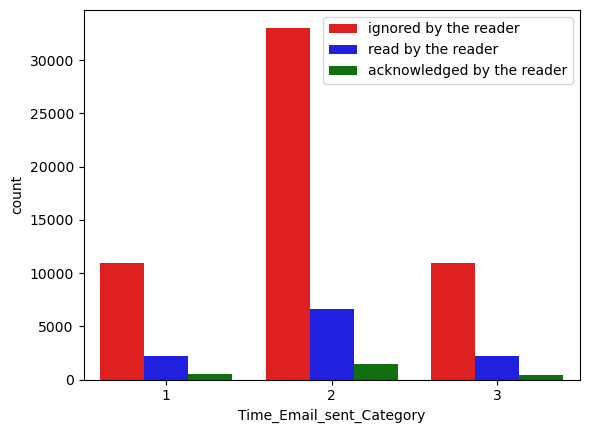

In [51]:
# Chart - 9 visualization code
sns.countplot(df, x= 'Time_Email_sent_Category', hue='Email_Status',palette=['r','b','g'])
plt.legend(['ignored by the reader','read by the reader','acknowledged by the reader'])
plt.show()

In [52]:
df.groupby(['Time_Email_sent_Category','Email_Status'])['Email_ID'].count().reset_index().rename(columns={"Email_ID": "count"})

,Time_Email_sent_Category,Email_Status,count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [54]:
nn=np.where((df['Email_Status']==1)|(df['Email_Status']==2))
df['Time_Email_sent_Category'].iloc[nn].mean()

2.00096928124068

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Reader read the mail which has words in range 400-800 or an average word count of 596.
2. Reader read the mail which where in average sent in time of evening whose code is 2.
3. Reader read the mail which where having a past communication average of 40.

In [98]:
import math
from scipy.stats import norm

In [99]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

Reader read the mail which has words in range 400-800 at least 400 words.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 400

Alternate Hypothesis : N < 400

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [100]:
# Perform Statistical Test to obtain P-Value
hypo_1=df[((df["Email_Status"]==1)|(df["Email_Status"]==2))&(df['Word_Count']!=None)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 400
sample_mean = hypo_1["Word_Count"].mean()
size = len(hypo_1)
std=(variance(hypo_1["Word_Count"]))**0.5

In [101]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="Word_Count")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 1.0.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has not been rejected and mail sent with at least 400 Words are read or acknowladged by the reader.

##### Why did you choose the specific statistical test?

C:\Users\Himanshu kumar\AppData\Local\Temp\ipykernel_3912\3631301886.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hypo_1["Word_Count"])


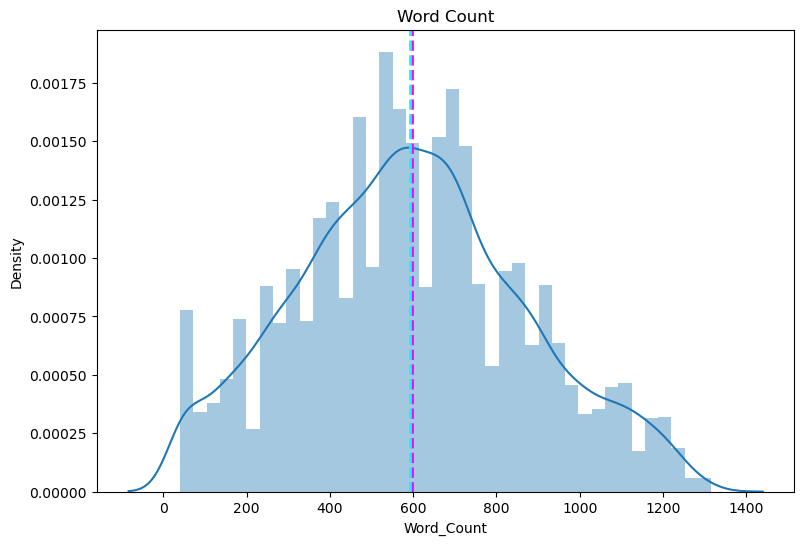

In [103]:

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["Word_Count"])
sns.distplot(hypo_1["Word_Count"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Word Count")
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***